# LIBRARIES **NEEDED**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2

In [2]:
from pathlib import Path
path=Path('train')

# **LABELS**

In [3]:
labels = os.listdir("train")

In [4]:
labels

['Closed', 'no_yawn', 'Open', 'yawn']

# Visulaizing random one image

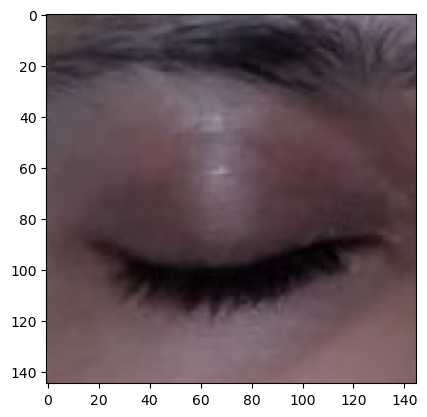

In [5]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("train/Closed/_0.jpg"))

# image array

In [6]:
a = plt.imread("train/yawn/10.jpg")

# image shape

In [7]:
a.shape

(480, 640, 3)

In [8]:
b = plt.imread("train/Open/_100.jpg")

In [9]:
b.shape

(300, 379, 3)

# visulaizing yawn image

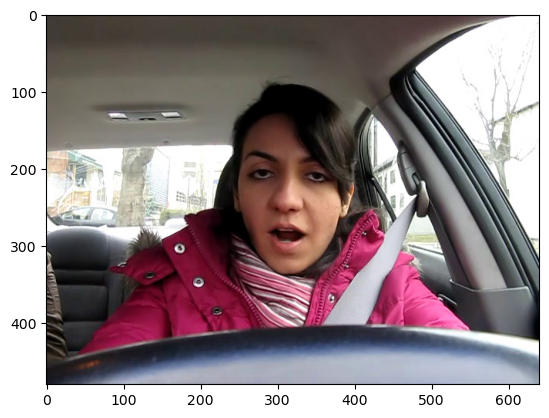

In [10]:
plt.imshow(plt.imread("train/yawn/10.jpg"))

# removing the unnecessay backgroud 

# for yawn and no_yawn

In [11]:
def face_for_yawn(direc="train", face_cas_path="haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3,5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no


yawn_no_yawn = face_for_yawn()

0
1


# for open and closed eyes

In [12]:
def get_data(dir_path="train/", face_cas="haarcascade_frontalface_default.xml", eye_cas="haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [13]:
data_train = get_data()

2
3


# extending the data and converting into an array

In [14]:
def append_data():
#     total_data = []
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no)

In [15]:
new_data = append_data()

0
1
2
3


C:\Users\bansa\AppData\Local\Temp\ipykernel_16268\2804427426.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(yaw_no)


# separate label and features

In [16]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

# reshape the array

In [17]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

# LabelBinizer

In [18]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

# label array

In [19]:
y = np.array(y)

# train-test spilt

In [20]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

# length of X_test

In [21]:
len(X_test)

578

# importing the dependencies

In [22]:
import tensorflow as tf
from tensorflow.python.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [23]:
tf.__version__

'2.10.0'

In [24]:
import keras
keras.__version__

'2.10.0'

# **SEQUENTIAL**

# data augmentation

In [25]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

# model

In [26]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 143, 143, 256)     7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 71, 71, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 69, 69, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        1

In [27]:
len(test_generator)

19

# history

In [28]:
history = model.fit(train_generator, validation_data=test_generator, epochs=10, shuffle=True,validation_steps=len(test_generator), steps_per_epoch=55)

Epoch 1/10
55/55 [==============================] - 25s 174ms/step - loss: 1.0763 - accuracy: 0.5269 - val_loss: 0.6265 - val_accuracy: 0.7612
Epoch 2/10
55/55 [==============================] - 9s 155ms/step - loss: 0.4460 - accuracy: 0.8082 - val_loss: 0.3577 - val_accuracy: 0.8616
Epoch 3/10
55/55 [==============================] - 8s 152ms/step - loss: 0.3504 - accuracy: 0.8446 - val_loss: 0.2968 - val_accuracy: 0.8858
Epoch 4/10
55/55 [==============================] - 8s 153ms/step - loss: 0.2692 - accuracy: 0.8995 - val_loss: 0.2637 - val_accuracy: 0.8927
Epoch 5/10
55/55 [==============================] - 8s 148ms/step - loss: 0.2793 - accuracy: 0.8821 - val_loss: 0.5813 - val_accuracy: 0.7803
Epoch 6/10
55/55 [==============================] - 8s 153ms/step - loss: 0.2862 - accuracy: 0.8821 - val_loss: 0.3181 - val_accuracy: 0.8720
Epoch 7/10
55/55 [==============================] - 8s 154ms/step - loss: 0.2400 - accuracy: 0.9018 - val_loss: 0.2149 - val_accuracy: 0.9152
Epoch

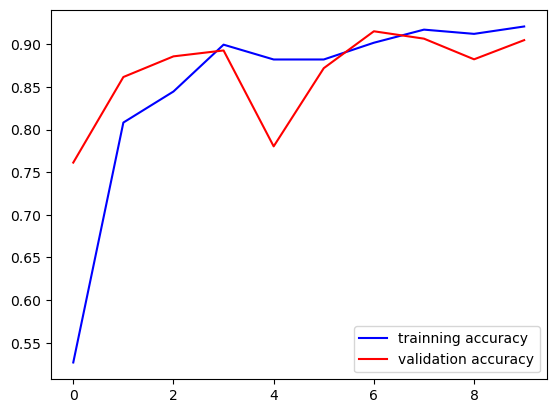

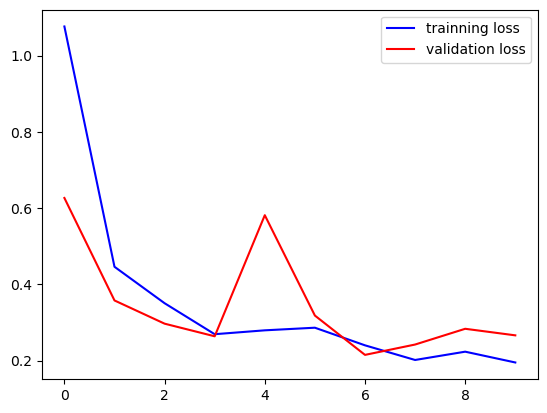

In [29]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

# saving the model

In [30]:
model.save("drowiness_new6")

INFO:tensorflow:Assets written to: drowiness_new6\assets


In [31]:
model.save("drowiness_new6")

INFO:tensorflow:Assets written to: drowiness_new6\assets


# prediction

In [32]:
score, acc = model.evaluate(X_test, y_test,verbose=2)
print('test accuracy:', acc)

19/19 - 1s - loss: 75.0759 - accuracy: 0.8270
test accuracy: 0.8269895911216736


#### model 2

In [33]:
model1 = Sequential()

model1.add(Conv2D(256, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model1.add(MaxPooling2D(2, 2))

model1.add(Conv2D(128, (3, 3), activation="relu"))
model1.add(MaxPooling2D(2, 2))
model1.add(Dropout(0.2))

model1.add(Conv2D(64, (3, 3), activation="relu"))
model1.add(MaxPooling2D(2, 2))

model1.add(Conv2D(64, (3, 3), activation="relu"))
model1.add(MaxPooling2D(2, 2))

model1.add(Flatten())
model1.add(Dropout(0.5))

model1.add(Dense(128, activation="relu"))
model1.add(Dense(4, activation="softmax"))

model1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 143, 143, 256)     7168      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 71, 71, 256)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 69, 69, 128)       295040    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 34, 34, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 34, 34, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        73792     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)       

In [39]:
history1 = model1.fit(train_generator, validation_data=test_generator, epochs=10, shuffle=True,validation_steps=len(test_generator), steps_per_epoch=55)

Epoch 1/10
55/55 [==============================] - 9s 115ms/step - loss: 1.0618 - accuracy: 0.4718 - val_loss: 1.5265 - val_accuracy: 0.4291
Epoch 2/10
55/55 [==============================] - 6s 116ms/step - loss: 0.7820 - accuracy: 0.5179 - val_loss: 1.7954 - val_accuracy: 0.5986
Epoch 3/10
55/55 [==============================] - 6s 100ms/step - loss: 0.7020 - accuracy: 0.5952 - val_loss: 1.6992 - val_accuracy: 0.5260
Epoch 4/10
55/55 [==============================] - 5s 100ms/step - loss: 0.6507 - accuracy: 0.6771 - val_loss: 1.0372 - val_accuracy: 0.6609
Epoch 5/10
55/55 [==============================] - 6s 101ms/step - loss: 0.5526 - accuracy: 0.7360 - val_loss: 0.6543 - val_accuracy: 0.7301
Epoch 6/10
55/55 [==============================] - 6s 102ms/step - loss: 0.4888 - accuracy: 0.7527 - val_loss: 1.3446 - val_accuracy: 0.6782
Epoch 7/10
55/55 [==============================] - 6s 102ms/step - loss: 0.5656 - accuracy: 0.7157 - val_loss: 0.5618 - val_accuracy: 0.7595
Epoch 

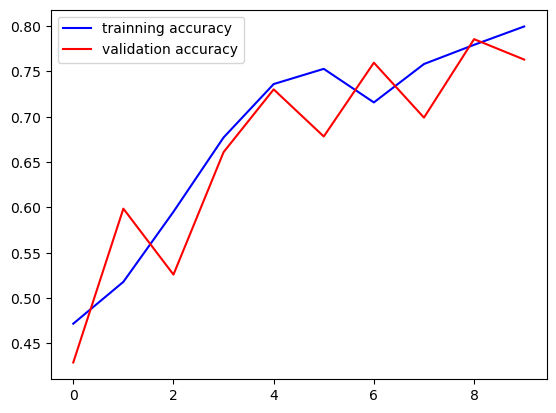

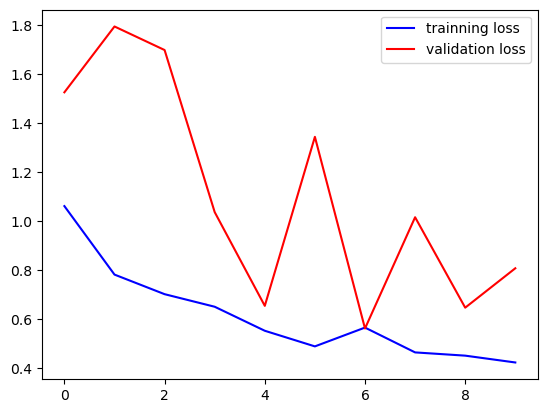

In [40]:
accuracy = history1.history['accuracy']
val_accuracy = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

### model3

In [41]:
model2 = Sequential()

model2.add(Conv2D(64, (3, 3), activation="relu", input_shape=X_train.shape[1:]))
model2.add(MaxPooling2D(2, 2))

model2.add(Conv2D(128, (3, 3), activation="relu"))
model2.add(MaxPooling2D(2, 2))
model2.add(Dropout(0.2))

model2.add(Conv2D(128, (3, 3), activation="relu"))
model2.add(MaxPooling2D(2, 2))

model2.add(Conv2D(256, (3, 3), activation="relu"))
model2.add(MaxPooling2D(2, 2))

model2.add(Flatten())
model2.add(Dropout(0.5))

model2.add(Dense(64, activation="relu"))
model2.add(Dense(4, activation="softmax"))

model2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 143, 143, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 71, 71, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 69, 69, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 34, 34, 128)       0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 34, 34, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 128)       147584    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 128)      

In [42]:
history2 = model2.fit(train_generator, validation_data=test_generator, epochs=10, shuffle=True,validation_steps=len(test_generator), steps_per_epoch=55)

Epoch 1/10
55/55 [==============================] - 8s 117ms/step - loss: 0.9197 - accuracy: 0.5218 - val_loss: 1.4660 - val_accuracy: 0.5363
Epoch 2/10
55/55 [==============================] - 5s 91ms/step - loss: 0.6414 - accuracy: 0.7065 - val_loss: 0.6615 - val_accuracy: 0.7474
Epoch 3/10
55/55 [==============================] - 5s 84ms/step - loss: 0.5919 - accuracy: 0.7111 - val_loss: 0.5576 - val_accuracy: 0.7768
Epoch 4/10
55/55 [==============================] - 5s 84ms/step - loss: 0.5049 - accuracy: 0.7351 - val_loss: 0.4812 - val_accuracy: 0.7716
Epoch 5/10
55/55 [==============================] - 5s 83ms/step - loss: 0.5004 - accuracy: 0.7534 - val_loss: 0.4371 - val_accuracy: 0.7924
Epoch 6/10
55/55 [==============================] - 5s 86ms/step - loss: 0.4337 - accuracy: 0.7827 - val_loss: 0.4079 - val_accuracy: 0.7993
Epoch 7/10
55/55 [==============================] - 5s 84ms/step - loss: 0.4374 - accuracy: 0.7728 - val_loss: 0.5804 - val_accuracy: 0.7768
Epoch 8/10
5

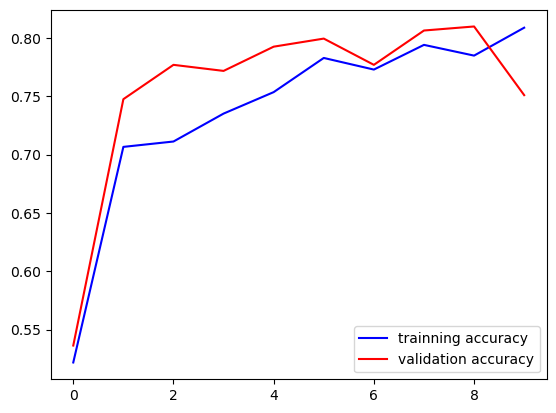

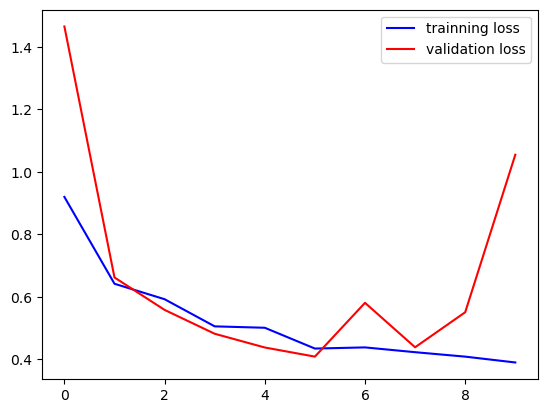

In [43]:
accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

# **RESENET50**

# data augmentation

In [34]:
y_test

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0]])

In [35]:
X_train

array([[[[ 40,  30,  30],
         [ 42,  32,  34],
         [ 37,  29,  30],
         ...,
         [139, 156, 177],
         [138, 155, 176],
         [139, 156, 177]],

        [[ 39,  29,  29],
         [ 39,  31,  32],
         [ 43,  35,  36],
         ...,
         [140, 157, 178],
         [141, 158, 179],
         [139, 156, 177]],

        [[ 39,  30,  30],
         [ 40,  32,  33],
         [ 41,  34,  35],
         ...,
         [140, 157, 178],
         [139, 157, 178],
         [137, 155, 175]],

        ...,

        [[145, 166, 194],
         [144, 166, 194],
         [145, 167, 195],
         ...,
         [163, 185, 210],
         [163, 185, 210],
         [163, 185, 210]],

        [[143, 164, 195],
         [143, 164, 195],
         [145, 167, 195],
         ...,
         [163, 185, 210],
         [163, 184, 210],
         [163, 185, 210]],

        [[141, 162, 192],
         [142, 164, 192],
         [143, 165, 193],
         ...,
         [163, 185, 210],
        

In [36]:
train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow(np.array(X_train),np.array(y_train) ,batch_size = 20)

validation_generator = test_datagen.flow(np.array(X_test), np.array(y_test),batch_size = 20)

In [37]:
import tensorflow as tf

In [38]:
from tensorflow.keras.applications.resnet50 import ResNet50
base_model=tf.keras.applications.resnet50.ResNet50(
input_shape=(224, 224,3), include_top=False, weights="imagenet"
)

#base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet")

23404544/94765736 [======>.......................] - ETA: 3:56

KeyboardInterrupt: 

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

# model

In [ ]:
model_1 = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4,activation='softmax')
])

In [ ]:
model_1.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

model_1.summary()

# history

In [ ]:
resnet_history = model_1.fit(train_generator, validation_data = validation_generator,epochs=10, steps_per_epoch = 100)